# Chicago Public Health Analysis

 Authors: Sarika, Jacob, and Didem

 

# Dependencies

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
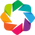

In [1]:
#library dependencies
import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import holoviews as hv
hv.extension('bokeh')
import scipy.stats as st
import hvplot.pandas
from scipy.stats import linregress
import warnings
warnings.simplefilter(action='ignore')
#!pip install hvplot geoviews

from api_keys import geoapify_key

In [2]:
# Import cities file as DataFrame
mp_df=pd.read_csv("Resources/chicago_public_health.csv")

In [3]:
# List of Regions with corresponding Community areas for data manipulation
RA=[{"Far North Side":["Rogers Park","West Ridge","Uptown","Lincoln Square","O'Hare","Edgewater","North Park","Albany Park","Edison Park","Norwood Park","Jefferson Park","Forest Glen"]},
{"Northwest Side":["North Center","Lake View","Lincoln Park","Avondale","Logan Square","Hermosa","Portage Park","Irving Park","Dunning","Montclaire","Belmont Cragin"]},
{"North Side":["Near North Side","West Town","Humboldt Park","Austin"]},
{"Central":["Loop","Near South Side","Near West Side"]},
{"West Side":["East Garfield Park","West Garfield Park","North Lawndale","South Lawndale","Lower West Side"]},
{"South Side":["Greater Grand Crossing","Armour Square","Douglas","Oakland","Fuller Park","Grand Boulevard","Kenwood","Washington Park","Hyde Park","Woodlawn","South Shore"]},
{"Southwest Side":["Bridgeport","New City","West Elsdon","Gage Park","Brighton Park","McKinley Park","Archer Heights","West Lawn","Chicago Lawn","Garfield Ridge","Clearing","West Englewood","Englewood"]},
{"Far Southwest Side":["Washington Heights","Auburn Gresham","Ashburn","Beverly","Mount Greenwood","Morgan Park"]},
{"Far Southeast Side":["Chatham","Avalon Park","South Chicago","Burnside","Calumet Heights","Roseland","Pullman","South Deering","East Side","West Pullman","Riverdale","Hegewisch"]}]

#Add a new column for Region
mp_df["Region"]=""

#Populate the new column - Region

for i in range(mp_df .shape[0]):
    cma=mp_df.loc[i,"Community Area Name"]
    for r in range(len(RA)):
        ra=list(RA[r])[0]
        if cma in RA[r][ra]:
            mp_df.loc[i,"Region"]=ra
            #print(cma,k)
            
            
#reorganize columns
column_to_move = mp_df.pop('Region')
mp_df.insert(2, 'Region', column_to_move)


#clean the data frame
clean_df = mp_df[["Region","Community Area Name","Per Capita Income","Below Poverty Level",
       "Birth Rate", "General Fertility Rate", "Low Birth Weight",
        "Prenatal Care Beginning in First Trimester", "Preterm Births",
       "Teen Birth Rate", "Diabetes-related", "Infant Mortality Rate","Childhood Lead Poisoning","Tuberculosis",
        "Crowded Housing","No High School Diploma"]]

clean_df

,Region,Community Area Name,Per Capita Income,Below Poverty Level,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Diabetes-related,Infant Mortality Rate,Childhood Lead Poisoning,Tuberculosis,Crowded Housing,No High School Diploma
0,Far North Side,Rogers Park,23714,22.7,16.4,62.0,11.0,73.0,11.2,40.8,77.1,6.4,0.5,11.4,7.9,18.1
1,Far North Side,West Ridge,21375,15.1,17.3,83.3,8.1,71.1,8.3,29.9,60.5,5.1,1.0,8.9,7.0,19.6
2,Far North Side,Uptown,32355,22.7,13.1,50.5,8.3,77.7,10.3,35.1,80.0,6.5,0.5,13.6,4.6,13.6
3,Far North Side,Lincoln Square,35503,9.5,17.1,61.0,8.1,80.5,9.7,38.4,55.4,3.8,0.4,8.5,3.1,12.5
4,Northwest Side,North Center,51615,7.1,22.4,76.2,9.1,80.4,9.8,8.4,49.8,2.7,0.9,1.9,0.2,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Far Southwest Side,Washington Heights,19709,15.7,12.0,61.0,19.6,75.4,16.2,65.0,79.5,11.2,1.5,3.0,1.1,15.6
73,Far Southwest Side,Mount Greenwood,34221,3.1,12.5,59.0,8.4,94.5,15.1,7.7,66.5,3.3,0.0,0.0,1.1,4.5
74,Far Southwest Side,Morgan Park,26185,13.7,13.2,67.5,10.6,74.5,12.3,46.7,75.4,13.1,1.3,2.6,0.8,10.9
75,Far North Side,O'Hare,29402,9.5,15.8,70.0,3.5,82.0,5.0,15.9,47.3,2.0,0.5,6.3,1.9,11.0


In [4]:
#linear regression function
def get_regress(x,y, title, xlabel, ylabel):
   plt.scatter(x=x,y=y)
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
   regress_values = x * slope + intercept
   line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
   plt.plot(x,regress_values, color='red')
   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   if sum(x) > 0:
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   else: 
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   print(f'The r-squared is: {rvalue**2}')
   print(f'The r-value is {rvalue}')
   print(f'The p-value is {pvalue}')
   print(f'The stderr is {stderr}')
   
   plt.show()

   

In [5]:
def linear_regression_2plots(x_values, y_values, y1_values, title, x_label, y_label, y1_label):
    
# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    (slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x_values, y1_values)

# Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolor="black")
    plt.plot(x_values,regress_values, (21/255, 95/255, 168/255))

# Get regression values- second plot
    regress_values1 = x_values * slope1 + intercept1
    line_eq1 = "y = " + str(round(slope1,2)) + "x +" + str(round(intercept1,2))
    plt.scatter(x_values,y1_values, edgecolor="red")
    plt.plot(x_values,regress_values1,"r-")
# Annotate the line equation
   
    plt.annotate(line_eq,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top', fontsize=15,color=(21/255, 95/255, 168/255))

# Annotate the line equation
   
    plt.annotate(line_eq1,(0.10, 0.80),xycoords='axes fraction', verticalalignment='baseline', fontsize=15,color="red")
    
    

 #Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label +" & "+ y1_label)
    
    plt.title(title)
   

# Print r, r^2, p value of first correlation
    print(f"The rvalue of {x_label} vs {y_label} is: {rvalue}")
    print(f"The r^2-value of {x_label} vs {y_label} is: {rvalue**2}")
    print(f"The pvalue of {x_label} vs {y_label} is:{pvalue:.20f}")
    
# Print r, r^2, p value of second correlation
    print(f"The rvalue  of {x_label} vs {y1_label} is: {rvalue1}")
    print(f"The r^2-value of {x_label} vs {y1_label} is: {rvalue1**2}")
    print(f"The pvalue of {x_label} vs {y1_label} is:{pvalue1:.20f}")
    
# Show plot
    plt.show()
    
    

    return

# EDA

## Q1 - Which community areas have high teen birth rates, does it have any relation with poverty level ? Is there a correlation between elevated rates of teen births and a lack of a high school diploma?  


The rvalue of Teen Birth Rate vs Below Poverty Level is: 0.6600382763346113
The r^2-value of Teen Birth Rate vs Below Poverty Level is: 0.43565052622676476
The pvalue of Teen Birth Rate vs Below Poverty Level is:0.00000000006598083935
The rvalue  of Teen Birth Rate vs No High School Diploma is: 0.5377815317886203
The r^2-value of Teen Birth Rate vs No High School Diploma is: 0.28920897593291484
The pvalue of Teen Birth Rate vs No High School Diploma is:0.00000045683168360775


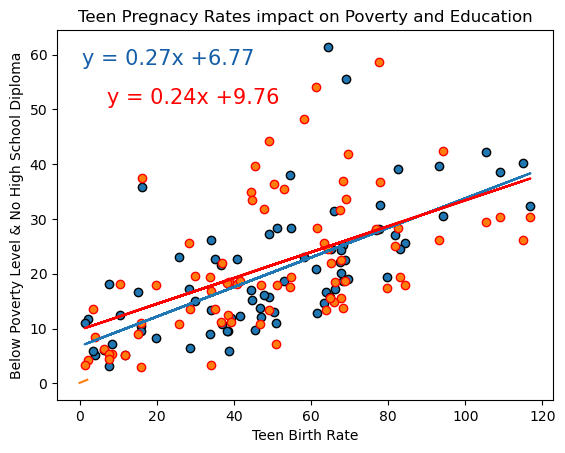

In [6]:
# plotting the two relationships on one graph - Teen Birth Rates Vs Below Poverty Level/ Teen Pregnacy Rates Vs No High School Diploma 
# Calling linear_regression_2plots function

linear_regression_2plots(clean_df['Teen Birth Rate'], clean_df['Below Poverty Level'],clean_df['No High School Diploma'] , "Teen Pregnacy Rates impact on Poverty and Education", 'Teen Birth Rate','Below Poverty Level',"No High School Diploma")

In [7]:
# Grouping data into Regions to focus on high-need Regions
Region_df= clean_df .groupby("Region")[["Teen Birth Rate","No High School Diploma", "Below Poverty Level"]].mean()
Region_TPE= Region_df.reset_index()
Region_TPE.sort_values(by="Teen Birth Rate", inplace= True, ascending=False)
Region_TPE.reset_index().drop("index",axis=1)

,Region,Teen Birth Rate,No High School Diploma,Below Poverty Level
0,West Side,88.700000,37.160000,34.780000
1,Far Southeast Side,63.516667,20.041667,23.758333
2,Southwest Side,60.961538,33.900000,19.807692
3,North Side,60.725000,19.650000,22.175000
4,South Side,49.645455,20.018182,31.781818
5,Far Southwest Side,42.116667,12.316667,11.950000
6,Northwest Side,41.254545,20.254545,13.009091
7,Central,29.633333,7.233333,14.600000
8,Far North Side,22.700000,14.891667,12.425000


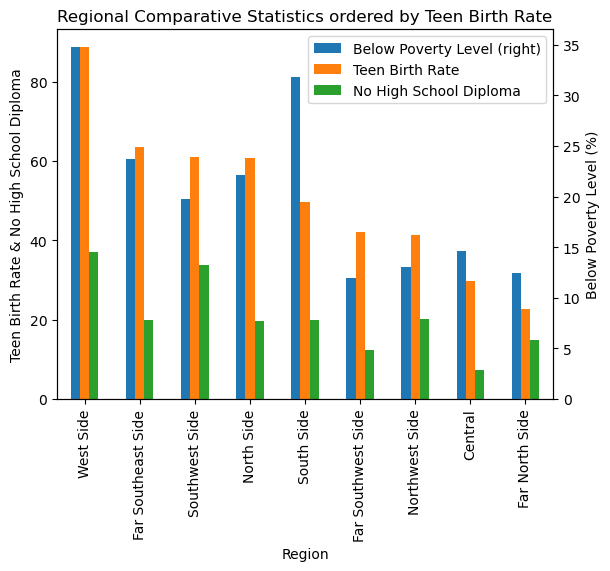

In [8]:
# Plotting data by Region to determine the high-need regions to focus on reducing Teen Pregnacy Rates.  
ax= Region_TPE.plot(kind="bar",x="Region",y=["Below Poverty Level","Teen Birth Rate","No High School Diploma"], secondary_y=("Below Poverty Level"))
#Set the title
plt.title("Regional Comparative Statistics ordered by Teen Birth Rate")

# Set the primary y-axis label
ax.set_ylabel("Teen Birth Rate & No High School Diploma")

# Set the secondary y-axis label
ax.right_ax.set_ylabel("Below Poverty Level (%)")

plt.show()

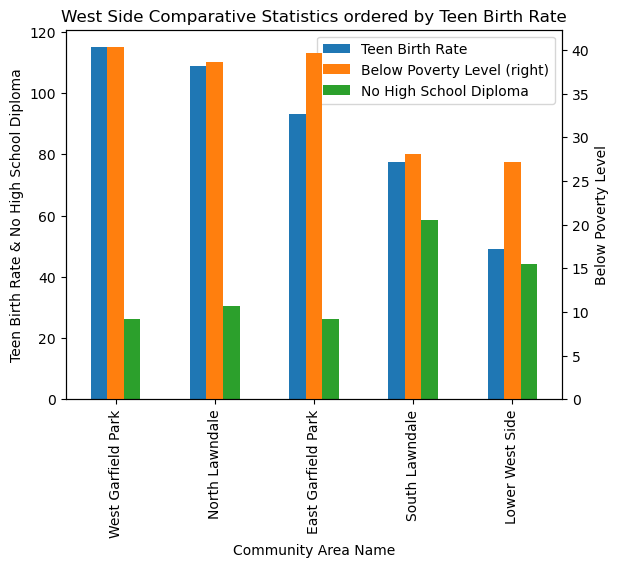

In [9]:
# Filtering data to focus on the Community Areas of the most high-need region - West Side 

WestSide_TPE= clean_df .loc[clean_df ["Region"]=="West Side"][["Community Area Name","Below Poverty Level","Teen Birth Rate","No High School Diploma",]]
WestSide_TPE.reset_index().drop("index",axis=1)

# Plot West Side Community Areas to determine the specific pulic welfare policy is needed in each Community area of West Side region.

ax= WestSide_TPE.sort_values(by="Teen Birth Rate", ascending=False).plot(kind="bar",x="Community Area Name",y=["Teen Birth Rate","Below Poverty Level","No High School Diploma"], secondary_y=("Below Poverty Level"))
#Set the title
plt.title("West Side Comparative Statistics ordered by Teen Birth Rate")

# Set the primary y-axis label
ax.set_ylabel("Teen Birth Rate & No High School Diploma")

# Set the secondary y-axis label
ax.right_ax.set_ylabel("Below Poverty Level")

plt.show()


### Analysis  
- Teen Birth Rate vs Poverty Level
    - Teen pregnancy rates and poverty levels show a strong positive correlation (r = 0.660) which implies that as the teen birth rate increases, the percentage of people living below the poverty line also tends to increase significantly. This suggests that teen pregnancy is a critical factor influencing economic disadvantage. Teen parents face socioeconomic challenges leading to interruptions in education and employment opportunities, which can perpetuate cycles of poverty among these families.  

    - The R-squared value of 0.4356 indicates that (43.6%) nearly half of the variability of poverty levels can be explained by teen birth rates. This means that while pregnancy is a major factor, other elements such as employment and education can also play a significant role.  

    - The extremely low p-value (0.000000000065) confirms that the relationship between birth rates and poverty levels is highly unlikely to be due to chance. This statistically significant result highlights the importance of addressing teen pregnancy as a means to reduce poverty.  
- Teen Birth Rate vs Education Level
    - Teen birth rate and education attainment show a moderate positive correlation (r= 0.538 ) which implies that as the teen birth rate increases, the number of individuals without a high school diploma also tends to increase. This suggests a higher teen birth rate is associated with lower educational attainment rates.
    
    - The R-squared value (0.289) indicates that about 28.9% of the variation in teen birth can be explained by  the lack of a high school diploma. This means that while teen pregnancy is an important factor, other variables also contribute to low education attainment rates, like access to education, and community resources.
    
    - The very low p-value (0.00000045) suggests that the correlation is statistically significant and not due to random chance. This finding strongly supports that teen pregnancy is an important factor influencing  education level, specifically the attainment of a high school diploma.

### Conclusion

Public welfare policy aimed at prevention of teen pregnancy like comprehensive sex-education and access to contraceptives can help reduce the number of teen parents and households living below poverty level in the West Garfiled Park, North Lawndale, and East Garfield Park. However, in South Lawndale and Lower West Side, along with teen pregnacy control measures, more importantly making education accessible will likely impact more for improving education attainment levels, specifically, obtaining a high school diploma.


___

## Q2 - Does a higher rate of crowded housing result in a higher rate of Tuberculosis?


In [10]:
tb_df = clean_df.loc[(~clean_df['Tuberculosis'].isna()) & (~clean_df['Crowded Housing'].isna())]

tb_df = tb_df.sort_values(by='Community Area Name').reset_index()

The r-squared is: 0.14649789157233806
The r-value is 0.382750429878711
The p-value is 0.0005914640171100566
The stderr is 0.08503895295507624


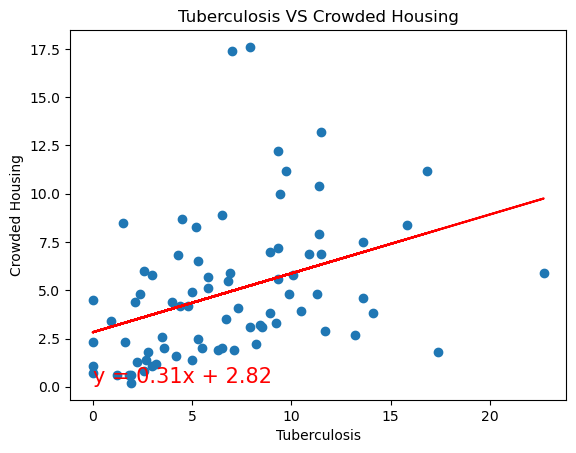

In [11]:
#Do higher rates of poverty/lower average income result in higher prevalence of childhood lead poisoning?
get_regress(tb_df['Tuberculosis'],tb_df['Crowded Housing'],'Tuberculosis VS Crowded Housing','Tuberculosis','Crowded Housing')


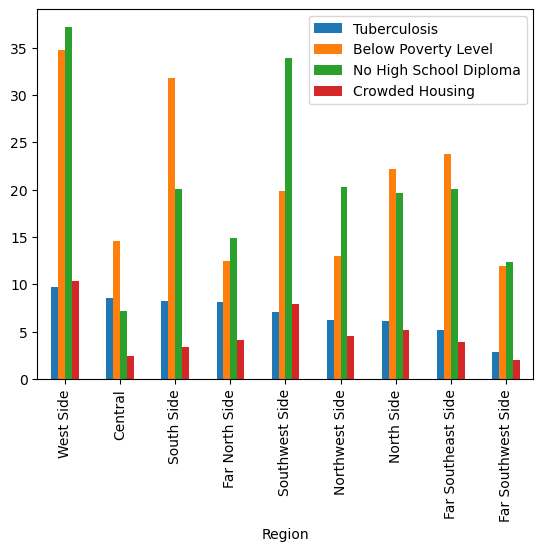

In [12]:
group_df = tb_df.groupby('Region')[['Crowded Housing','Tuberculosis','Per Capita Income','Below Poverty Level','No High School Diploma']].mean()

group_df=group_df.sort_values('Tuberculosis', ascending=False)

group_df.plot(kind='bar',y=['Tuberculosis','Below Poverty Level','No High School Diploma', 'Crowded Housing'])

plt.show()

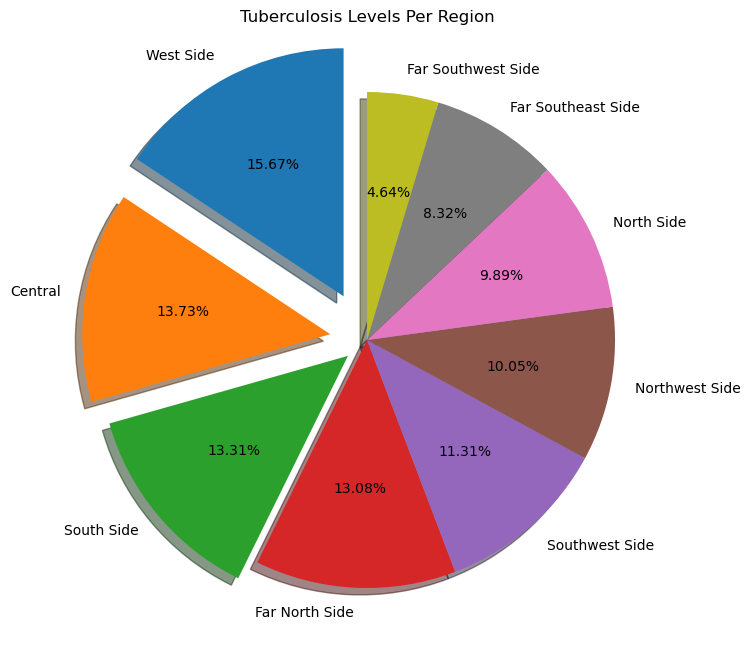

In [13]:
labels = group_df.index


fig, ax = plt.subplots()

ax.pie(group_df['Tuberculosis'],labels=labels, autopct='%.2f%%', shadow=True, startangle=90, explode=[.2,.15,.1,0,0,0,0,0,0])
ax.set_title('Tuberculosis Levels Per Region')
fig.set_size_inches(8,10)
plt.show()


### Analysis

- The R-squared value of 0.1465 indicates that about 14.65% of the variation in tuberculosis rates can be explained by the level of crowded housing. While this suggests some relationship, it also implies that a significant portion of the variation in tuberculosis rates is due to factors other than crowded housing.
- The r-value of 0.3828 suggests a moderate positive correlation between crowded housing and tuberculosis rates. This indicates that areas with higher levels of crowded housing tend to have higher tuberculosis rates. However, the correlation is not strong, meaning other factors could also be contributing to the variability in tuberculosis rates.
- The p-value of 0.000591 is very low, indicating that the relationship between crowded housing and tuberculosis rates is statistically significant. This suggests that the observed correlation is unlikely to have occurred by chance, and there is a meaningful relationship between these variables.

### Conclusion

The results suggest that efforts to reduce crowded housing conditions could potentially have a positive impact on reducing tuberculosis rates. However, given the relatively low $r^2$ value, it is clear that other factors, such as healthcare access, nutrition, or general living conditions, might also play significant roles and should be considered in further analyses or interventions.

___

## Q3- Do certain socioeconomic brackets have a higher risk of certain health markers?

The r-squared is: 0.36224641349477216
The r-value is -0.6018690999667388
The p-value is 7.055262629933287e-09
The stderr is 0.00013257909326109304


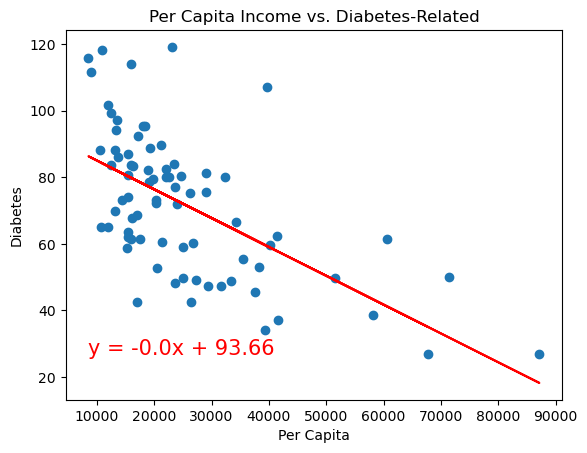

In [14]:
# Make a copy of the dataset
econ_clean_df = clean_df.copy()

#remove NaN values
diabetes_na_df = econ_clean_df.loc[(~econ_clean_df['Per Capita Income'].isna()) & (~econ_clean_df['Diabetes-related'].isna())]

#Make a scatter plot to understand the relationship, if any, between per capita income and diabetes-related deaths
get_regress(diabetes_na_df['Per Capita Income'],diabetes_na_df['Diabetes-related'],'Per Capita Income vs. Diabetes-Related','Per Capita','Diabetes')

### Analysis

The results of the linear regression analysis of per capita income (PCI) vs. diabetes-related deaths per 100.000 population indicate a strong negative correlation between these two variables with an r-value of -0.6. The p-value is below the level of significance of 0.05, which suggests that there is sufficient evidence in our observed results to reject the null hypothesis. The coefficient of determination is relatively low, which indicates that only 36% of the variation in diabetes-related deaths can be explained by income. Further analysis is needed to understand other factors that might be affecting diabetes related mortality.  

In [15]:
#create new clean dataframe
econ_clean_df = clean_df.copy()

#Establish the bins
bins = [0, 30000, 60000, 90000]

#assign group labels
group_labels = ["<$30000", "$30000-60000", "$60000-90000"]

#cut the dataframe 
econ_clean_df["Per Capita Income Ranges"] = pd.cut(econ_clean_df["Per Capita Income"], bins, labels=group_labels, right=False)

In [16]:
#Group the mean of the number of diabetes-related deaths per 100,000 population by income range 
grouped_income_diabetes = econ_clean_df.groupby(["Per Capita Income Ranges"])["Diabetes-related"].mean()

reset_income_diabetes = grouped_income_diabetes.reset_index()

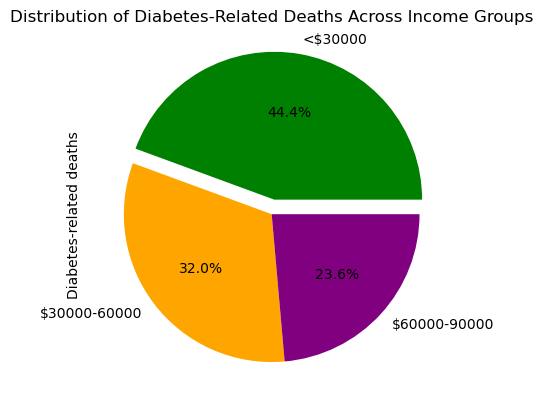

In [17]:
# Make a pie chart to show the distribution of diabetes-related mortality across income groups
labels = ["<$30000","$30000-60000","$60000-90000"]
colors = ["green","orange","purple"]
explode=[0.1,0,0]
diabetes_pie = reset_income_diabetes.plot(kind="pie", y="Diabetes-related", labels=labels, legend=False, colors=colors, explode=explode, ylabel="Diabetes-related deaths", autopct='%1.1f%%')
plt.title("Distribution of Diabetes-Related Deaths Across Income Groups")
plt.show()


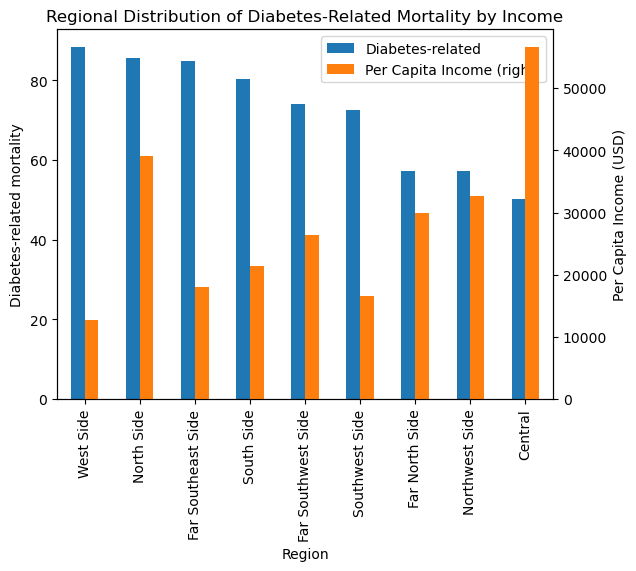

In [18]:
#Make a bar chart to show the regional distribution of diabetes related mortality vs. per capita income
diabetes_regional_df = econ_clean_df.groupby('Region')[['Per Capita Income',"Diabetes-related"]].mean()

#Sort the data by diabetes-related mortality 
diabetes_regional_df_sorted= diabetes_regional_df.sort_values('Diabetes-related', ascending=False)

# Plotting data by Region to determine the high-need regions to focus on reducing Diabetes-Related Mortality Rates.
ax= diabetes_regional_df_sorted.plot(kind="bar",y=['Diabetes-related','Per Capita Income'], secondary_y=('Per Capita Income'))

#Set the title
plt.title("Regional Distribution of Diabetes-Related Mortality by Income")

# Set the primary y-axis label
ax.set_ylabel("Diabetes-related mortality")

# Set the secondary y-axis label
ax.right_ax.set_ylabel("Per Capita Income (USD)")
plt.show()




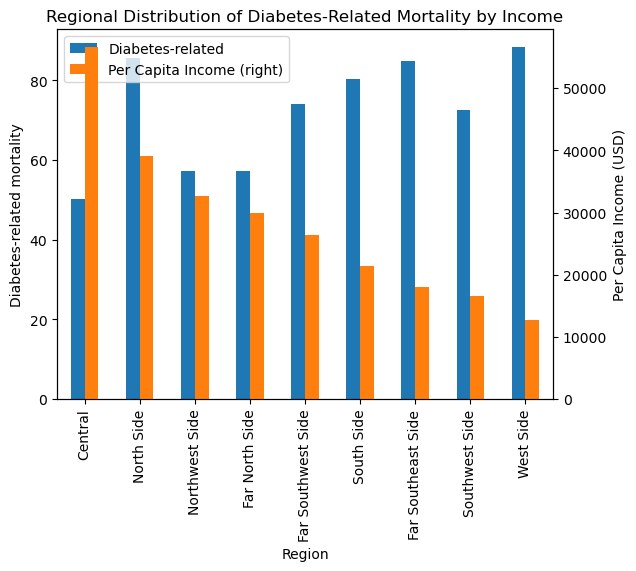

In [19]:
#Make a bar chart to show the regional distribution of diabetes related mortality vs. per capita income
diabetes_regional_df = econ_clean_df.groupby('Region')[['Per Capita Income',"Diabetes-related"]].mean()

#Sort the data by per capita income
diabetes_regional_df_sorted= diabetes_regional_df.sort_values('Per Capita Income', ascending=False)

# Plotting data by Region to determine the high-need regions to focus on reducing Diabetes-Related Mortality Rates.
ax= diabetes_regional_df_sorted.plot(kind="bar",y=['Diabetes-related','Per Capita Income'], secondary_y=('Per Capita Income'))
#Set the title
plt.title("Regional Distribution of Diabetes-Related Mortality by Income")

# Set the primary y-axis label
ax.set_ylabel("Diabetes-related mortality")

# Set the secondary y-axis label
ax.right_ax.set_ylabel("Per Capita Income (USD)")
plt.show()


### Analysis

In the second part of the analysis, per capita income data is grouped under three income range groups: less than 30000 USD , 30000-60000 USD and 60000-90000 USD. The goal is to determine which income groups would benefit most from an intervention to reduce diabetes-related mortality. The mean of diabetes-related mortality is highest in communities with an average per capita income of less than 30.000 USD.

A closer look at the regions represented in our dataset could help us identify regions that do not follow the pattern of strong negative correlation between per capita income and diabetes-related mortality. One such example is the North Side region which has the second highest diabetes-related mortality rate despite a relatively high per capita income. The other region that diverges from the correlation pattern is the Southwest Side where both diabetes-related mortality figures and per capita income averages are lower. Further analysis is needed to see what makes these two regions stand out from the rest of the regions in the dataset as well as understand other factors that might be affecting diabetes-related mortality in these regions.  

___

## Q4 - Which community areas have a high IMR? Does IMR correlate with  early prenatal care? Is early prenatal care available in Chicago proving effective from the perspective of IMR? Does early prenatal care correlate with Low Birth Weight (LBW) , and Preterm Births (PTB). Will a higher level of prenatal care result in fewer incidences of LBW and PTB?  Are there any OTHER significant drivers of these values?


-------Early Prenatal Care Vs IMR-----------
The r^2-value for Early Prenatal Care Vs IMR is: 0.21745347540592852
The rvalue for Early Prenatal Care Vs IMR is: -0.46631907038628445
The pvalue for Early Prenatal Care Vs IMR is:0.00001916566272012915
-------Early Prenatal Care Vs Low Birth Weight-----------
The r^2-value for Early Prenatal Care Vs LBW is: 0.28360566242623775
The rvalue for Early Prenatal Care Vs LBW  is: -0.5325463946232645
The pvalue  for Early Prenatal Care Vs LBW is:0.00000061880228707744
-------Early Prenatal Care Vs Preterm Births-----------
The r^2-value for Early Prenatal Care Vs PTB is: 0.1708851381690829
The rvalue for Early Prenatal Care Vs PTB  is: -0.41338255668216445
The pvalue  for Early Prenatal Care Vs PTB is:0.00018646156072107083


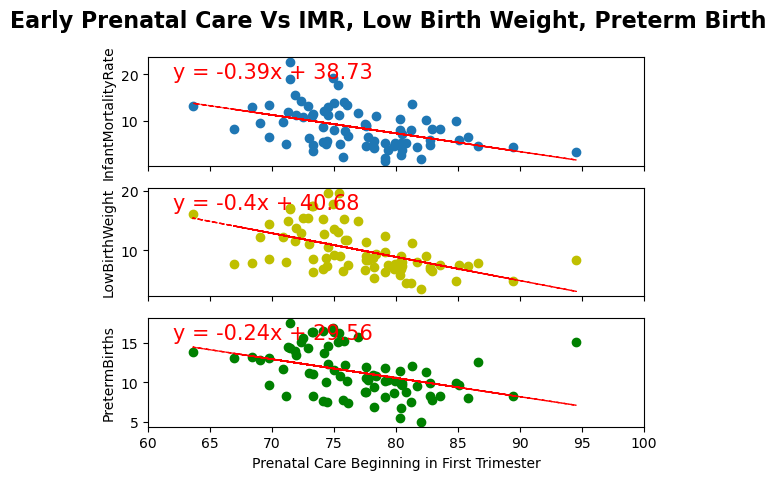

In [20]:
# Perform a linear regression on Early Prenatal Care  versus Infant Mortality Rate
imr_slope, imr_int, imr_r, imr_p, imr_std_err = st.linregress(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Infant Mortality Rate"])
imr_fit = imr_slope * clean_df ["Prenatal Care Beginning in First Trimester"]+ imr_int

# Perform a linear regression on Early Prenatal Care  versus Low Birth Weight
lbw_slope, lbw_int, lbw_r, lbw_p, lbw_std_err = st.linregress(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Low Birth Weight"])
lbw_fit = lbw_slope * clean_df ["Prenatal Care Beginning in First Trimester"] + lbw_int

# Perform a linear regression on Early Prenatal Care  versus Preterm Births
ptb_slope, ptb_int, ptb_r, ptb_p, ptb_std_err = st.linregress(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Preterm Births"])
ptb_fit = ptb_slope * clean_df ["Prenatal Care Beginning in First Trimester"] + ptb_int

# Generate a facet plot of all 3 figures and Print r^2 value, rvalue, and pvalue
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Early Prenatal Care Vs IMR, Low Birth Weight, Preterm Birth", fontsize=16, fontweight="bold")

ax1.set_xlim(60,100)
ax1.scatter(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Infant Mortality Rate"],  marker="o")
ax1.plot(clean_df ["Prenatal Care Beginning in First Trimester"], imr_fit, "r--", linewidth=1)
line_eq_imr = "y = " + str(round(imr_slope,2)) + "x + " + str(round(imr_int,2))
ax1.annotate(line_eq_imr,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax1.set_ylabel("InfantMortalityRate")
print("-------Early Prenatal Care Vs IMR-----------")
print(f"The r^2-value for Early Prenatal Care Vs IMR is: {imr_r**2}")
print(f"The rvalue for Early Prenatal Care Vs IMR is: {imr_r}")
print(f"The pvalue for Early Prenatal Care Vs IMR is:{imr_p:.20f}")

ax2.scatter(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Low Birth Weight"], linewidth=1, marker="o", color="y")
ax2.plot(clean_df ["Prenatal Care Beginning in First Trimester"], lbw_fit, "r--", linewidth=1)
line_eq_lbw = "y = " + str(round(lbw_slope,2)) + "x + " + str(round(lbw_int,2))
ax2.annotate(line_eq_lbw,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax2.set_ylabel("LowBirthWeight")
print("-------Early Prenatal Care Vs Low Birth Weight-----------")
print(f"The r^2-value for Early Prenatal Care Vs LBW is: {lbw_r**2}")
print(f"The rvalue for Early Prenatal Care Vs LBW  is: {lbw_r}")
print(f"The pvalue  for Early Prenatal Care Vs LBW is:{lbw_p:.20f}")

ax3.scatter(clean_df ["Prenatal Care Beginning in First Trimester"], clean_df ["Preterm Births"], linewidth=1, marker="o", color="g")
ax3.plot(clean_df ["Prenatal Care Beginning in First Trimester"], ptb_fit, "r--", linewidth=1)
line_eq_ptb = "y = " + str(round(ptb_slope,2)) + "x + " + str(round(ptb_int,2))
ax3.annotate(line_eq_ptb,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax3.set_ylabel("PretermBirths")
ax3.set_xlabel("Prenatal Care Beginning in First Trimester")
print("-------Early Prenatal Care Vs Preterm Births-----------")
print(f"The r^2-value for Early Prenatal Care Vs PTB is: {ptb_r**2}")
print(f"The rvalue for Early Prenatal Care Vs PTB  is: {ptb_r}")
print(f"The pvalue  for Early Prenatal Care Vs PTB is:{ptb_p:.20f}")

plt.show()

### Analysis 

- The p values (0.000019,0.0000006,0.000186) ranging from very low to low indicate that the relationships are statistically significant and not due to chance. This underscores the importance of promoting and ensuring access to quality early prenatal care as a public health strategy to reduce infant mortality, incidences of low birth weight and preterm births.  
- The r values (-0.46, -0.53, -0.41) show a moderate negative correlation. This aligns with the understanding that early prenatal care can help identify and manage potential health risks to the mother and infant, thereby improving outcomes.  
- The r-squared values (0.217, 0.283, 0.170) show a moderate (IMR and LBW) to limited (PTB) explanatory power which indicates that while early prenatal care is an important factor in explaining the variability in IMR, LBW, and PTB, there are other factors in play, like poverty, that can limit the access to early prenatal care and Employment that in turn limits the affordability of early prenatal care.  

-------Poverty Level Vs IMR-----------
The r^2-value for Poverty Level Vs IMR is: 0.34900605396076745
The rvalue for Poverty Level Vs IMR is: 0.5907673433431874
The pvalue  for Poverty Level Vs IMR is:0.00000001551378433733
------- Poverty Level Vs Low Birth Weight-----------
The r^2-value for  Poverty Level Vs LBW is: 0.46382707076527385
The rvalue for  Poverty Level Vs LBW  is: 0.6810485083790095
The pvalue  for  Poverty Level Vs LBW is:0.00000061880228707744
------Poverty Level Vs Preterm Births-----------
The r^2-value for Poverty Level Vs PTB is: 0.3034970555551272
The rvalue for Poverty Level PTB  is: 0.5509056684724956
The pvalue  for Poverty Level Vs PTB is:0.00000020863033293229


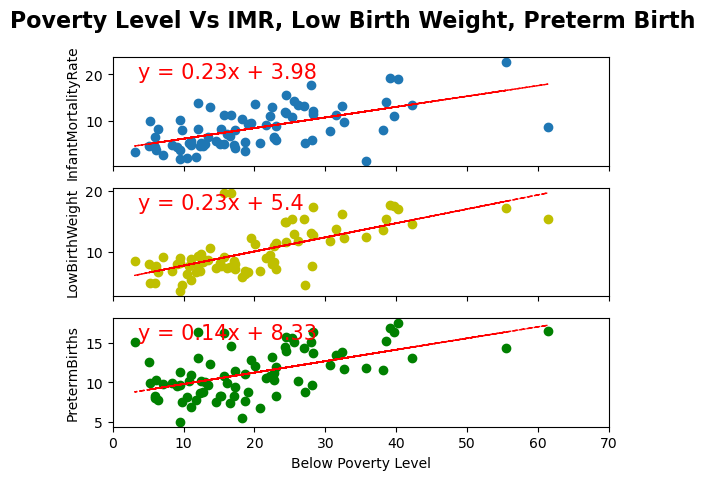

In [21]:
# Perform a linear regression on Povert Level versus Infant Mortality Rate
imr_slope, imr_int, imr_r, imr_p, imr_std_err = st.linregress(clean_df ["Below Poverty Level"], clean_df ["Infant Mortality Rate"])
imr_fit = imr_slope * clean_df ["Below Poverty Level"]+ imr_int

# Perform a linear regression on Povert Level versus Low Birth Weight
lbw_slope, lbw_int, lbw_r, lbwr_p, lbw_std_err = st.linregress(clean_df ["Below Poverty Level"], clean_df ["Low Birth Weight"])
lbw_fit = lbw_slope * clean_df ["Below Poverty Level"] + lbw_int

# Perform a linear regression on Povert Level versus Preterm Births
ptb_slope, ptb_int, ptb_r, ptb_p, ptb_std_err = st.linregress(clean_df ["Below Poverty Level"], clean_df ["Preterm Births"])
ptb_fit = ptb_slope * clean_df ["Below Poverty Level"] + ptb_int

# Generate a facet plot of all 3 figures and Print r^2 value, rvalue, and pvalue
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Poverty Level Vs IMR, Low Birth Weight, Preterm Birth", fontsize=16, fontweight="bold")

ax1.set_xlim(0,70)
ax1.scatter(clean_df ["Below Poverty Level"], clean_df ["Infant Mortality Rate"],  marker="o")
ax1.plot(clean_df ["Below Poverty Level"], imr_fit, "r--", linewidth=1)
line_eq_imr = "y = " + str(round(imr_slope,2)) + "x + " + str(round(imr_int,2))
ax1.annotate(line_eq_imr,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax1.set_ylabel("InfantMortalityRate")
print("-------Poverty Level Vs IMR-----------")
print(f"The r^2-value for Poverty Level Vs IMR is: {imr_r**2}")
print(f"The rvalue for Poverty Level Vs IMR is: {imr_r}")
print(f"The pvalue  for Poverty Level Vs IMR is:{imr_p:.20f}")

ax2.scatter(clean_df ["Below Poverty Level"], clean_df ["Low Birth Weight"], linewidth=1, marker="o", color="y")
ax2.plot(clean_df ["Below Poverty Level"], lbw_fit, "r--", linewidth=1)
line_eq_lbw = "y = " + str(round(lbw_slope,2)) + "x + " + str(round(lbw_int,2))
ax2.annotate(line_eq_lbw,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax2.set_ylabel("LowBirthWeight")
print("------- Poverty Level Vs Low Birth Weight-----------")
print(f"The r^2-value for  Poverty Level Vs LBW is: {lbw_r**2}")
print(f"The rvalue for  Poverty Level Vs LBW  is: {lbw_r}")
print(f"The pvalue  for  Poverty Level Vs LBW is:{lbw_p:.20f}")

ax3.scatter(clean_df ["Below Poverty Level"], clean_df ["Preterm Births"], linewidth=1, marker="o", color="g")
ax3.plot(clean_df ["Below Poverty Level"], ptb_fit, "r--", linewidth=1)
line_eq_ptb = "y = " + str(round(ptb_slope,2)) + "x + " + str(round(ptb_int,2))
ax3.annotate(line_eq_ptb,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top',fontsize=15,color ="r")
ax3.set_ylabel("PretermBirths")
ax3.set_xlabel("Below Poverty Level")
print("------Poverty Level Vs Preterm Births-----------")
print(f"The r^2-value for Poverty Level Vs PTB is: {ptb_r**2}")
print(f"The rvalue for Poverty Level PTB  is: {ptb_r}")
print(f"The pvalue  for Poverty Level Vs PTB is:{ptb_p:.20f}")

plt.show()

### Analysis
- The p values (0.00000005, 0.0000006, 0.0000002) ranging from very low to extremely low indicate that the relationship is statistically significant and not due to chance.  This reinforces the importance of addressing poverty as a critical factor in efforts to reduce IMR, LBW, and PTB.  

- The r values (0.59, 0.68 ,0.55) show a strong positive correlation for IMR and LBW and a moderate to strong positive correlation for PTB.This could be due to various factors linked to poverty, such as poor maternal health, inadequate access to healthcare, lack of education about nutrition and prenatal care, and greater exposure to environmental toxins.  

- The R-squared values (0.349, 0.463, 0.303) show a moderate (IMR and PTB) to high (LBW) explanatory power which  indicates that while poverty significantly affects IMR and PTB, other factors also play important roles. Poverty alone explains a significant portion of the variability in the incidences of LBW, underscoring its critical role.



In [22]:
#Grouping the Care related data by Region to focus on high-need regions

Region_BPIWP= clean_df .groupby("Region")[["Below Poverty Level","Prenatal Care Beginning in First Trimester","Infant Mortality Rate","Low Birth Weight","Preterm Births"]].mean()
Region_Care= Region_BPIWP.reset_index()
Region_Care.sort_values(by="Below Poverty Level", inplace= True, ascending=False)
Region_Care.reset_index().drop("index",axis=1)

,Region,Below Poverty Level,Prenatal Care Beginning in First Trimester,Infant Mortality Rate,Low Birth Weight,Preterm Births
0,West Side,34.780000,77.260000,11.080000,12.380000,13.480000
1,South Side,31.781818,75.090909,12.136364,13.318182,12.781818
2,Far Southeast Side,23.758333,73.208333,11.216667,12.325000,14.208333
3,North Side,22.175000,72.250000,8.675000,11.350000,11.600000
4,Southwest Side,19.807692,78.307692,8.092308,9.030769,9.969231
5,Central,14.600000,77.966667,6.533333,7.700000,9.433333
6,Northwest Side,13.009091,78.127273,4.700000,7.254545,8.781818
7,Far North Side,12.425000,79.250000,5.175000,7.641667,9.108333
8,Far Southwest Side,11.950000,80.566667,10.566667,10.683333,13.116667


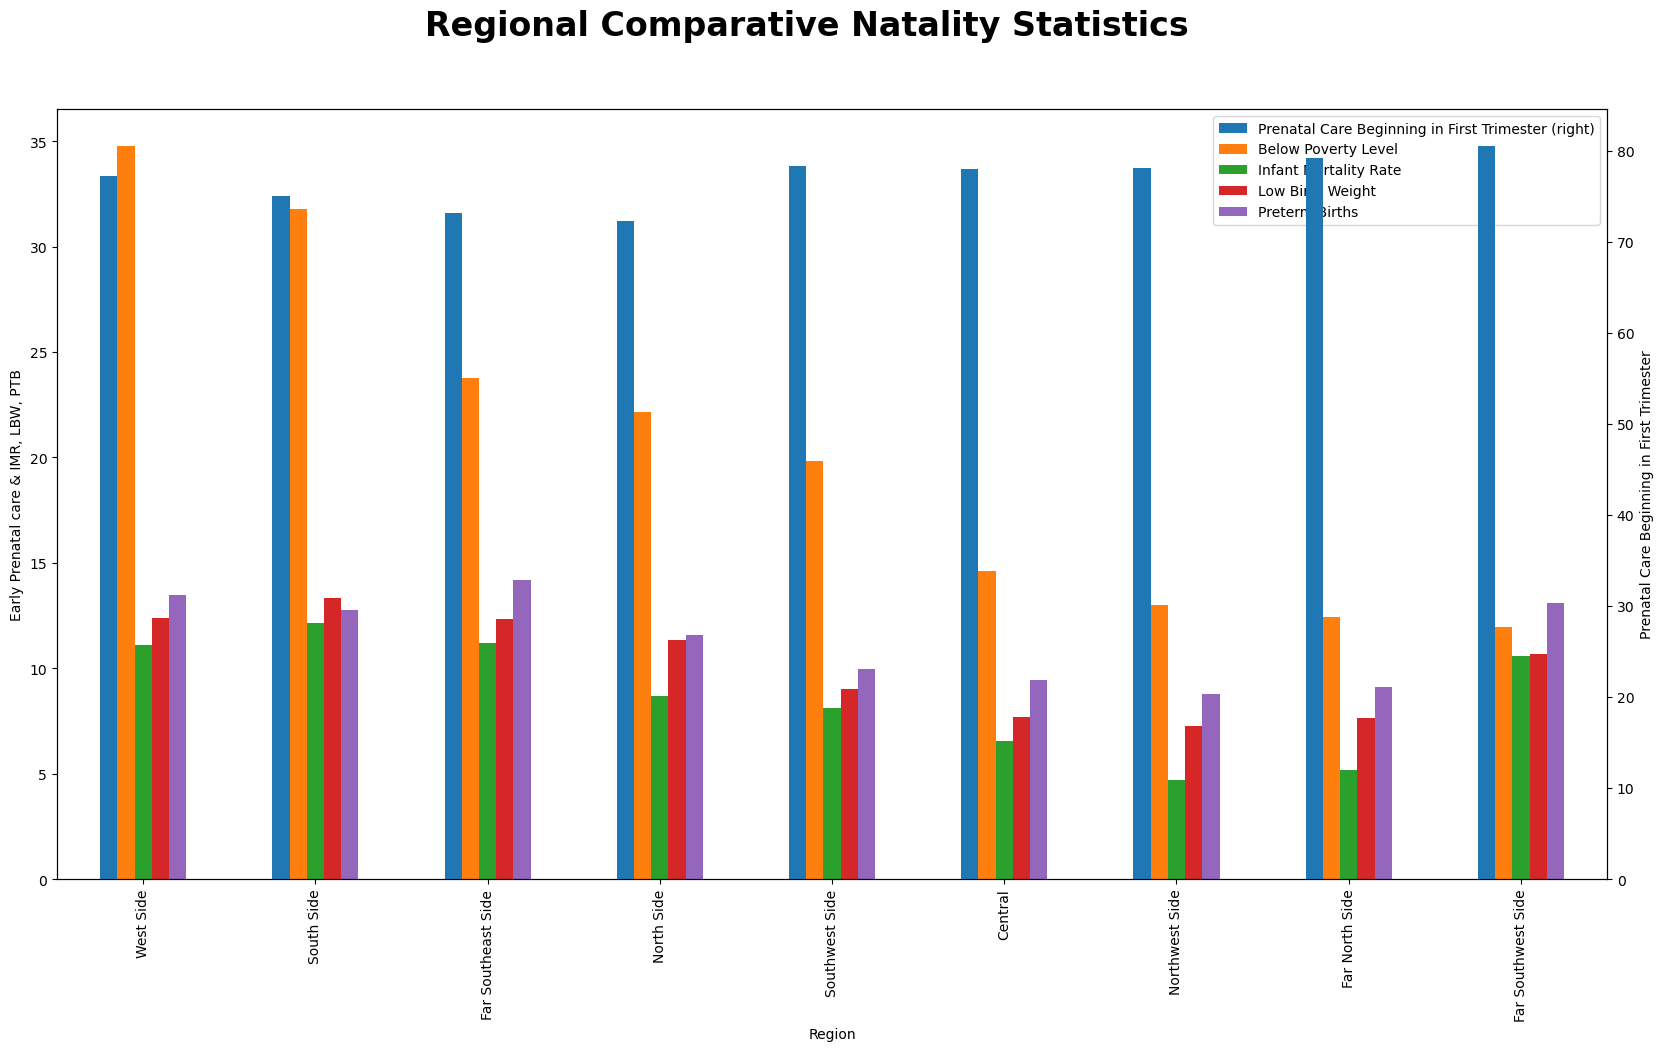

In [23]:
#Plotting the grouped data to find the high-need regions to focus for reducing Infant Mortality Rate, Low Birth Weight, Preterm Births
ax=Region_Care.sort_values(by="Below Poverty Level", ascending=False).plot(kind="bar",x="Region",y=["Prenatal Care Beginning in First Trimester","Below Poverty Level","Infant Mortality Rate","Low Birth Weight","Preterm Births"], secondary_y=("Prenatal Care Beginning in First Trimester"),figsize=(20,10))

#set titla
plt.suptitle('Regional Comparative Natality Statistics',fontsize=24, fontweight='bold')
# Set the primary y-axis label
ax.set_ylabel("Early Prenatal care & IMR, LBW, PTB")
# Set the secondary y-axis label
ax.right_ax.set_ylabel("Prenatal Care Beginning in First Trimester")

plt.show()

### Plotting on Map - High-need Community Areas

In [24]:
#Focusing on regions at two ends of poverty spectrum - West Side and Far Southwest Side 

# In FarSouthwestside, the high IMR, LBW, and PTB despite low poverty makes us think if the region based averages are skewing the data
# Are some community areas that have high poverty level hidden within the Far Southwest Side region

WestSideFarSouthwestside_TPE= clean_df .loc[(clean_df ["Region"]=="West Side") | (clean_df ["Region"]=="Far Southwest Side")][["Region","Community Area Name","Below Poverty Level","Prenatal Care Beginning in First Trimester","Infant Mortality Rate","Low Birth Weight","Preterm Births"]]

WestSideFarSouthwestside_TPE

,Region,Community Area Name,Below Poverty Level,Prenatal Care Beginning in First Trimester,Infant Mortality Rate,Low Birth Weight,Preterm Births
25,West Side,West Garfield Park,40.3,71.4,19.0,17.0,17.5
26,West Side,East Garfield Park,39.7,73.2,11.0,17.5,16.3
28,West Side,North Lawndale,38.6,75.8,14.1,15.3,15.2
29,West Side,South Lawndale,28.1,85.1,5.9,7.6,9.6
30,West Side,Lower West Side,27.2,80.8,5.4,4.5,8.8
69,Far Southwest Side,Ashburn,9.5,82.4,10.2,9.0,11.3
70,Far Southwest Side,Auburn Gresham,24.5,71.8,15.6,11.6,13.9
71,Far Southwest Side,Beverly,5.2,84.8,10.0,4.9,9.9
72,Far Southwest Side,Washington Heights,15.7,75.4,11.2,19.6,16.2
73,Far Southwest Side,Mount Greenwood,3.1,94.5,3.3,8.4,15.1


On further analysis, as suspected, even though the average poverty level in the Far Southwest Side is 11.950000, Auburn Gresham, a community area within the region has a much higher poverty level (24.5) in comparison to the other community areas in that region. We have to be careful in our data analysis and drill down on outliers or anomalies encountered while analysing data.


In [25]:
# Sourcing location data from Geoapify API to plot the community areas in the two regions under consideration on a map to summarize
# Add columns the data we will fetch using the Geoapify API
# Note that we used "" to specify initial entry.

WestSideFarSouthwestside_TPE["Lat"]=""
WestSideFarSouthwestside_TPE["Lon"] = ""


# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"
# Loop through the DataFrame and search coordinates for high-need community areas of interest in the Chicago city
for index, row in WestSideFarSouthwestside_TPE.iterrows():
         
    # Get the community area's name and add ", Chicago" to the string so geoapify finds the area in the city

    area = row["Community Area Name"]+ ", Chicago"
        
    # Add the current area to the parameters
    params["text"]= f"{area}"

    # Make the API request
    response= requests.get(base_url, params=params)

    # Convert response to JSON
    response = response.json()
   
    try:
        WestSideFarSouthwestside_TPE.loc[index, "Lat"]=response['results'][0]["lat"]
        WestSideFarSouthwestside_TPE.loc[index, "Lon"]=response['results'][0]["lon"]
       
    except Exception as e:
        print(e)
        print(row)
   
    # Log the search results
    print(f"Coordinates for {area} fetched...")

# Display sample data to confirm that the coordinates appear
#WestSideFarSouthwestside_TPE


Coordinates for West Garfield Park, Chicago fetched...
Coordinates for East Garfield Park, Chicago fetched...
Coordinates for North Lawndale, Chicago fetched...
Coordinates for South Lawndale, Chicago fetched...
Coordinates for Lower West Side, Chicago fetched...
Coordinates for Ashburn, Chicago fetched...
Coordinates for Auburn Gresham, Chicago fetched...
Coordinates for Beverly, Chicago fetched...
Coordinates for Washington Heights, Chicago fetched...
Coordinates for Mount Greenwood, Chicago fetched...
Coordinates for Morgan Park, Chicago fetched...


In [26]:
# Showing on map the community areas as points - The size of the points show the acuteness of poverty and hover boxes show the other statistics.

map_plot_BPL = WestSideFarSouthwestside_TPE.hvplot.points(
    "Lon",
    "Lat",
    geo=True, 
    tiles="OSM",
    frame_width = 500,
    frame_height = 700,
    color ="Community Area Name",
    scale= 3.0,
    size="Below Poverty Level",
    hover_cols=["Infant Mortality Rate","Below Poverty Level","Community Area Name", "Region"]
    
)
map_plot_BPL

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Community Area Name,Below Poverty Level,Infant Mortality Rate,Region)

### Conclusion

In Chicago, early prenatal care is effective for those who have access to it. However, poverty limits this access, so it is a significant driver of high Infant Mortality rate and higher incidences of Low Birth Weights and Preterm Births. Some community areas, like West Garfield park (West Side ) and Auburn Gresham (Far Southwest Side), in the two regions under consideration show acute poverty and in these areas the individuals below the poverty line face significant economic hardship that limits their access to early prenatal healthcare leading to concerning natality statistics. Public health and welfare policies should focus on alleviating poverty and hence increasing access to early prenatal care in these high-need community areas to address the issue of high IMR, LBW, and PTB.

___